# LASI2021 Machine Learning Workshop
## K Nearest Neighbor (KNN)

## 0. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## 1. Import Dataset

In [2]:
df = pd.read_csv("data/knndata.csv")

In [3]:
df.head(10)

,preptest_score,forum_particip_score,incoming_GPA,label
0,84,6.9,1.5,1
1,93,6.7,0.7,1
2,92,8.2,1.2,1
3,96,7.9,3.4,1
4,73,6.9,1.2,1
5,58,6.7,3.8,0
6,87,9.5,3.4,0
7,71,9.8,3.2,0
8,58,9.8,2.0,0
9,97,9.4,1.9,1


In [4]:
df.describe()

,preptest_score,forum_particip_score,incoming_GPA,label
count,2555.000000,2555.000000,2555.000000,2555.000000
mean,74.334638,8.187319,1.897613,0.650098
std,16.178416,1.373275,1.108785,0.477032
min,9.000000,1.700000,0.000000,0.000000
25%,64.000000,7.400000,1.000000,0.000000
50%,76.000000,8.500000,1.800000,1.000000
75%,87.000000,9.300000,2.800000,1.000000
max,100.000000,10.000000,4.000000,1.000000


## 2. Exploratory Data Analysis

In [5]:
df.corr()

,preptest_score,forum_particip_score,incoming_GPA,label
preptest_score,1.000000,-0.013650,0.001559,0.053228
forum_particip_score,-0.013650,1.000000,0.018404,-0.285956
incoming_GPA,0.001559,0.018404,1.000000,-0.046588
label,0.053228,-0.285956,-0.046588,1.000000


In [6]:
X1 = df.iloc[:,0].values
X2 = df.iloc[:,1].values
X3 = df.iloc[:,2].values
y = df.iloc[:,3].values
rgb = np.array(['g','b'])

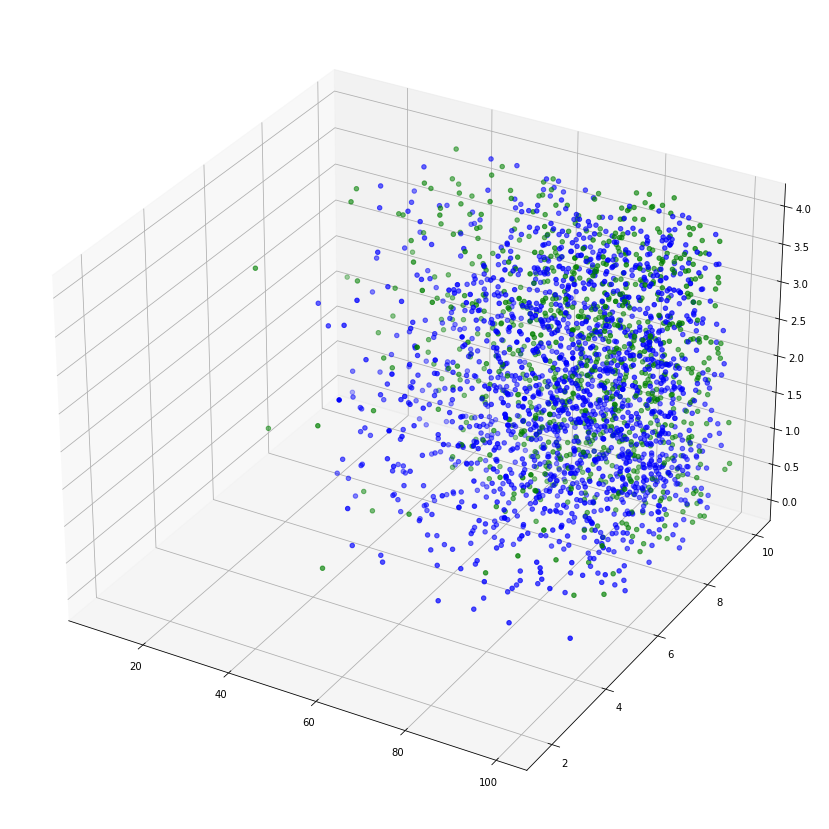

In [7]:
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,X3,color=rgb[y])

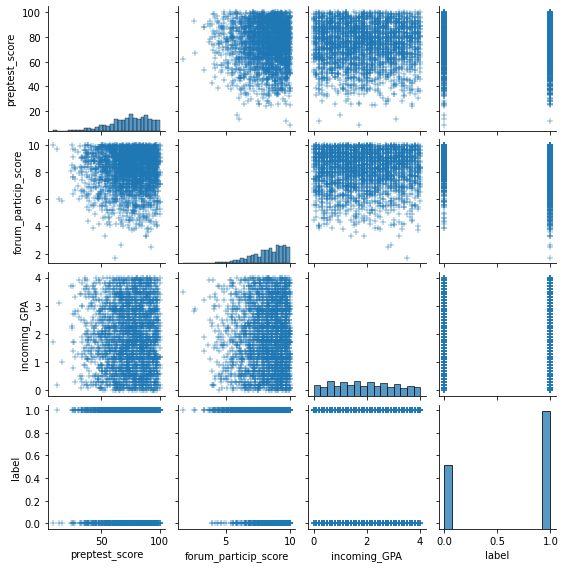

In [8]:
sns.pairplot(df,markers="+",height=2)

## 3. Run KNN Model

In [9]:
X = df.drop(['label'],axis=1)
y = df['label']

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

## 4. Evaluate Classifier

In [24]:
y_pred = knn.predict(X)

In [25]:
print(metrics.accuracy_score(y,y_pred))

0.786692759295499


In [26]:
print(metrics.confusion_matrix(y,y_pred))

[[ 569  325]
 [ 220 1441]]


In [27]:
print(metrics.classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       894
           1       0.82      0.87      0.84      1661

    accuracy                           0.79      2555
   macro avg       0.77      0.75      0.76      2555
weighted avg       0.78      0.79      0.78      2555



## 5. Predict New Points

In [34]:
new_points = [[99,9,3.9],[10,1,1.1],[22,2,2]]

In [35]:
predict = knn.predict(new_points)

In [36]:
predict

array([1, 0, 0])